<a href="https://colab.research.google.com/github/ssondhi2027/pytorch-ml/blob/main/carsCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time
import torch.optim as optim

In [2]:
#!pip install tensorflow tensorflow-datasets

In [3]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    "plant_village",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/plant_village/incomplete.JQIZ5V_1.0.2/plant_village-train.tfrecord*...:   …

Dataset plant_village downloaded and prepared to /root/tensorflow_datasets/plant_village/1.0.2. Subsequent calls will reuse this data.


In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation = 'softmax')
])

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(ds_train, validation_data=ds_test, epochs=5)

Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 70s 51ms/step - accuracy: 0.9765 - loss: 0.0732 - val_accuracy: 0.8482 - val_loss: 0.7611
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 68s 50ms/step - accuracy: 0.9758 - loss: 0.0745 - val_accuracy: 0.8466 - val_loss: 0.9221
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.8410 - val_loss: 0.8856
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 68s 50ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.8297 - val_loss: 1.0449
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.9882 - loss: 0.0416 - val_accuracy: 0.8470 - val_loss: 0.9936


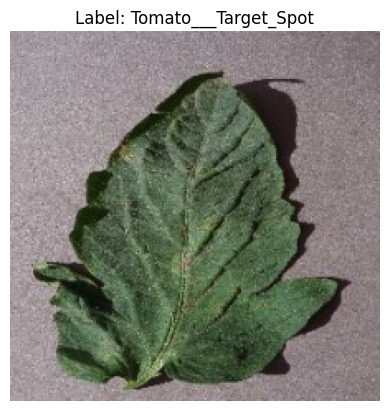

In [15]:
for image, label in ds_train.take(1):
    plt.imshow(image[0].numpy())
    plt.title(f"Label: {ds_info.features['label'].int2str(label[0].numpy())}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


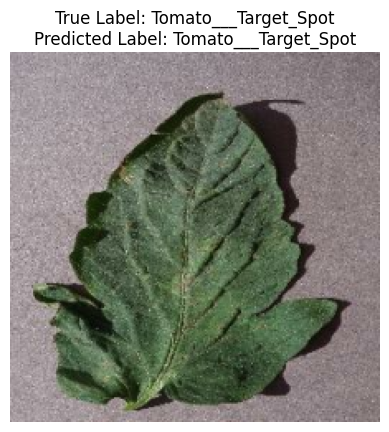

In [16]:
for image, label in ds_train.take(1):
    # Expand dimensions to create a batch of 1 image
    input_image = tf.expand_dims(image[0], axis=0)

    # Get model prediction
    predictions = model.predict(input_image)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions[0])

    # Get the predicted class name
    predicted_class_name = ds_info.features['label'].int2str(predicted_class_index)

    # Get the true class name
    true_class_name = ds_info.features['label'].int2str(label[0].numpy())

    plt.imshow(image[0].numpy())
    plt.title(f"True Label: {true_class_name}\nPredicted Label: {predicted_class_name}")
    plt.axis('off')
    plt.show()